In [2]:
pwd

'/home/wsuser/work'

In [4]:
ls

In [9]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='9OMVrOOLf54EqiYfXU3G5wo3EroPfv267cvwfrfWoaXA',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

bucket = 'imageprediction-donotdelete-pr-llv4ekaixbowth'
object_key = 'Dataset-20221105T103729Z-001 (3).zip'

streaming_body_4 = cos_client.get_object(Bucket=bucket, Key=object_key)['Body']

# Your data file was loaded into a botocore.response.StreamingBody object.
# Please read the documentation of ibm_boto3 and pandas to learn more about the possibilities to load the data.
# ibm_boto3 documentation: https://ibm.github.io/ibm-cos-sdk-python/
# pandas documentation: http://pandas.pydata.org/


In [10]:
from io import BytesIO
import zipfile
unzip=zipfile.ZipFile(BytesIO(streaming_body_4.read()),'r')
file_paths=unzip.namelist()
for path in file_paths:
    unzip.extract(path)

In [11]:
ls

Dataset/


In [12]:
pwd

'/home/wsuser/work'

In [18]:
from keras.preprocessing.image import ImageDataGenerator

In [19]:
train_datagen = ImageDataGenerator(rescale = 1./255, horizontal_flip = True, shear_range = 0.2, zoom_range = 0.2) #for train data

In [20]:
test_datagen = ImageDataGenerator(rescale = 1./255)

In [13]:
ls

Dataset/


In [14]:
pwd

'/home/wsuser/work'

In [16]:
from keras.preprocessing.image import ImageDataGenerator
import numpy as np#used for numerical analysis
import tensorflow #open source used for both ML and DL for computation
from tensorflow.keras.models import Sequential #it is a plain stack of Layers
from tensorflow.keras import layers #A Layer consists of a tensor-in tensor-out computation function
#Dense Layer is the regular deeply connected neural network Layer
from tensorflow.keras.layers import Dense, Flatten
#Faltten-used fot flattening the input or change the dimension
from tensorflow.keras.layers import Conv2D, MaxPooling2D,Dropout #Convolutional layer
#MaxPooling2D-for downsampling the image
from keras.preprocessing.image import ImageDataGenerator

In [17]:
train_datagen = ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255)

In [22]:
ls

Dataset/


In [23]:
pwd

'/home/wsuser/work'

In [47]:
x_train = train_datagen.flow_from_directory('/home/wsuser/work/Dataset/TEST_SET',
                                           target_size=(64,64),
                                           class_mode='categorical',
                                           batch_size=100)

Found 1055 images belonging to 5 classes.


In [48]:
x_test = test_datagen.flow_from_directory('/home/wsuser/work/TRAIN_SET',
                                         target_size=(64,64),
                                         class_mode='categorical',
                                         batch_size=100)

Found 4118 images belonging to 5 classes.


In [30]:
print(x_train.class_indices)#checking the number of classes

{'APPLES': 0, 'BANANA': 1, 'ORANGE': 2, 'PINEAPPLE': 3, 'WATERMELON': 4}


In [49]:
print(x_test.class_indices)

{'APPLES': 0, 'BANANA': 1, 'ORANGE': 2, 'PINEAPPLE': 3, 'WATERMELON': 4}


In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D, MaxPooling2D,Flatten, Dense

In [34]:
from collections import Counter as c 
c(x_train .labels)

Counter({0: 157, 1: 287, 2: 160, 3: 294, 4: 157})

In [33]:
model=Sequential()

In [35]:
classifier = Sequential()

In [36]:

# First convolution layer and pooling
classifier.add(Conv2D(32,(3, 3), input_shape=(64, 64, 3),activation='relu')) 
classifier.add(MaxPooling2D(pool_size=(2, 2)))
# Second convolution layer and pooling
classifier.add(Conv2D(32, (3, 3), activation='relu'))
# input_shape is going to be the pooled feature maps from the previous convolution layer 
classifier.add(MaxPooling2D(pool_size=(2, 2)))
# Flattening the Layers
classifier.add(Flatten())
# Adding fully connected Layer a
classifier.add(Dense (units=128, activation='relu'))
classifier.add(Dense (units=5, activation='softmax')) # softmax for more than 2

In [37]:
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense (Dense)               (None, 128)              

In [40]:
classifier.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [42]:
len(x_train)

211

In [50]:
len(x_test)

42

In [51]:
classifier.fit_generator(generator=x_train,steps_per_epoch = len(x_train),epochs=5,validation_data=x_test,validation_steps = len(x_test))

/tmp/wsuser/ipykernel_164/3408015686.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  classifier.fit_generator(generator=x_train,steps_per_epoch = len(x_train),epochs=5,validation_data=x_test,validation_steps = len(x_test))


Epoch 1/5
11/11 [==============================] - 15s 1s/step - loss: 0.9218 - accuracy: 0.6085 - val_loss: 1.9483 - val_accuracy: 0.4840
Epoch 2/5
11/11 [==============================] - 14s 1s/step - loss: 0.1940 - accuracy: 0.9564 - val_loss: 3.7318 - val_accuracy: 0.4653
Epoch 3/5
11/11 [==============================] - 14s 1s/step - loss: 0.0528 - accuracy: 0.9924 - val_loss: 5.4143 - val_accuracy: 0.4415
Epoch 4/5
11/11 [==============================] - 14s 1s/step - loss: 0.0169 - accuracy: 0.9962 - val_loss: 6.3972 - val_accuracy: 0.4315
Epoch 5/5
11/11 [==============================] - 14s 1s/step - loss: 0.0071 - accuracy: 0.9991 - val_loss: 6.5510 - val_accuracy: 0.4415


In [52]:
ls

Dataset/  TRAIN_SET/


In [53]:
classifier.save('nutrition.h5')

In [54]:
ls

Dataset/  nutrition.h5  TRAIN_SET/


In [55]:
pwd

'/home/wsuser/work'

In [56]:
import numpy as np
from tensorflow.keras.models  import load_model
from tensorflow.keras.preprocessing import image

In [57]:
model = load_model("nutrition.h5") #Loading the model for testing
from tensorflow.keras.preprocessing import image

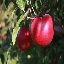

In [60]:
img = image.load_img(r'/home/wsuser/work/TRAIN_SET/APPLES/n07740461_11134.jpg',grayscale=False,target_size= (64,64))
img

In [64]:
x=image.img_to_array(img)

In [65]:
x

array([[[ 40.,  46.,  20.],
        [ 33.,  37.,  14.],
        [ 33.,  38.,  16.],
        ...,
        [ 22.,  29.,  21.],
        [ 22.,  33.,  17.],
        [ 38.,  50.,  38.]],

       [[ 41.,  44.,  17.],
        [ 34.,  44.,  17.],
        [ 33.,  41.,  20.],
        ...,
        [ 28.,  39.,  25.],
        [ 36.,  49.,  29.],
        [ 27.,  39.,  27.]],

       [[ 40.,  55.,  24.],
        [ 32.,  45.,  17.],
        [ 30.,  34.,  19.],
        ...,
        [ 30.,  38.,  25.],
        [ 29.,  40.,  24.],
        [ 23.,  31.,  20.]],

       ...,

       [[163., 175., 111.],
        [ 66.,  82.,  43.],
        [ 24.,  38.,  23.],
        ...,
        [ 21.,  34.,  24.],
        [ 16.,  26.,  17.],
        [ 20.,  20.,  18.]],

       [[159., 171., 105.],
        [121., 136.,  79.],
        [ 25.,  39.,  22.],
        ...,
        [ 19.,  32.,  22.],
        [ 18.,  28.,  19.],
        [ 21.,  21.,  21.]],

       [[162., 173., 104.],
        [162., 173., 104.],
        [ 36.,  

In [66]:
x=np.expand_dims(x,axis=0)

In [67]:
x

array([[[[ 40.,  46.,  20.],
         [ 33.,  37.,  14.],
         [ 33.,  38.,  16.],
         ...,
         [ 22.,  29.,  21.],
         [ 22.,  33.,  17.],
         [ 38.,  50.,  38.]],

        [[ 41.,  44.,  17.],
         [ 34.,  44.,  17.],
         [ 33.,  41.,  20.],
         ...,
         [ 28.,  39.,  25.],
         [ 36.,  49.,  29.],
         [ 27.,  39.,  27.]],

        [[ 40.,  55.,  24.],
         [ 32.,  45.,  17.],
         [ 30.,  34.,  19.],
         ...,
         [ 30.,  38.,  25.],
         [ 29.,  40.,  24.],
         [ 23.,  31.,  20.]],

        ...,

        [[163., 175., 111.],
         [ 66.,  82.,  43.],
         [ 24.,  38.,  23.],
         ...,
         [ 21.,  34.,  24.],
         [ 16.,  26.,  17.],
         [ 20.,  20.,  18.]],

        [[159., 171., 105.],
         [121., 136.,  79.],
         [ 25.,  39.,  22.],
         ...,
         [ 19.,  32.,  22.],
         [ 18.,  28.,  19.],
         [ 21.,  21.,  21.]],

        [[162., 173., 104.],
       

In [71]:
y= np.argmax(model.predict(x),axis=1)

In [72]:
y

array([3])

In [74]:
x_train.class_indices

{'APPLES': 0, 'BANANA': 1, 'ORANGE': 2, 'PINEAPPLE': 3, 'WATERMELON': 4}

In [81]:
index=['APPLES', 'BANANA', 'ORANGE','PINEAPPLE','WATERMELON']

In [82]:
index[y[0]]

'APPLES'

In [80]:
img=image.load_img(r'/home/wsuser/work/Dataset/TEST_SET/APPLES/5_100.jpg',grayscale=False,target_size= (64,64))
x=image.img_to_array(img)
x = np.expand_dims(x,axis=0) #changing the shape =
y =np.argmax(model.predict(x),axis=1)
index=['APPLES', 'BANANA', 'ORANGE','PINEAPPLE','WATERMELON']
index[y[0]]

'APPLES'

In [83]:
img=image.load_img(r'/home/wsuser/work//Dataset/TEST_SET/BANANA/100_100.jpg',grayscale=False,target_size= (64,64))
x=image.img_to_array(img)
x = np.expand_dims(x,axis=0) #changing the shape =
y =np.argmax(model.predict(x),axis=1)
index=['APPLES', 'BANANA', 'ORANGE','PINEAPPLE','WATERMELON']
index[y[0]]

'BANANA'

In [85]:
img=image.load_img(r'/home/wsuser/work/Dataset/TEST_SET/PINEAPPLE/0_100.jpg',grayscale=False,target_size= (64,64))
x=image.img_to_array(img)
x = np.expand_dims(x,axis=0) #changing the shape =
y =np.argmax(model.predict(x),axis=1)
index=['APPLES', 'BANANA', 'ORANGE','PINEAPPLE','WATERMELON']
index[y[0]]

'PINEAPPLE'

In [88]:
img=image.load_img(r'/home/wsuser/work/Dataset/TEST_SET/ORANGE/30_100.jpg',grayscale=False,target_size= (64,64))
x=image.img_to_array(img)
x = np.expand_dims(x,axis=0) #changing the shape =
y =np.argmax(model.predict(x),axis=1)
index=['APPLES', 'BANANA', 'ORANGE','PINEAPPLE','WATERMELON']
index[y[0]]

'ORANGE'

In [89]:
img=image.load_img(r'/home/wsuser/work/Dataset/TEST_SET/WATERMELON/125_100.jpg',grayscale=False,target_size= (64,64))
x=image.img_to_array(img)
x = np.expand_dims(x,axis=0) #changing the shape =
y =np.argmax(model.predict(x),axis=1)
index=['APPLES', 'BANANA', 'ORANGE','PINEAPPLE','WATERMELON']
index[y[0]]

'WATERMELON'

In [96]:
!tar -zcvf image-classification-model.tgz nutrition.h5

nutrition.h5


IBM Deployment

In [97]:
!tar -zcvf image-classification-model.tgz nutrition.h5

nutrition.h5


In [98]:
import tensorflow as tf

In [99]:
tf.__version__

'2.7.2'

In [90]:
!pip install watson-machine-learning-client

     |████████████████████████████████| 538 kB 16.4 MB/s eta 0:00:01


In [92]:
!pip install keras==2.2.4
!pip install tensorflow==2.5.0

In [93]:
from ibm_watson_machine_learning import APIClient
wml_credentials={
    "url":"https://us-south.ml.cloud.ibm.com",
    "apikey": "mvD9uH2XT7dZZf-7SAS7hLPBA8AfBd9pCSzGNIsC26uO"
}

client=APIClient(wml_credentials)

In [94]:
client

In [95]:
def guid_space_name(client,nutrition_deploy):
    space=client.spaces.get_details()
    return(next(item for item in space['resources'] if item['entity']['name']==nutrition_deploy)['metadata']['id'])

Deployment

In [100]:
space_uid=guid_space_name(client,'nutrition_deploy')
print("Space UID " + space_uid)

Space UID ef027b06-f8be-4794-a8d8-78f31828274d


In [101]:
client.set.default_space(space_uid)

'SUCCESS'

In [102]:
client.software_specifications.list(200)

-------------------------------  ------------------------------------  ----
NAME                             ASSET_ID                              TYPE
default_py3.6                    0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12        020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt       069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6          09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12       09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9        0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6            0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                       0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod     1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6                10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl        111e41b3-de2d-5422-a4d6-bf776828c4b7  base
autoai-kb_rt

In [103]:
software_space_uid=client.software_specifications.get_uid_by_name('tensorflow_rt22.1-py3.9')

In [104]:
software_space_uid

'acd9c798-6974-5d2f-a657-ce06e986df4d'

In [105]:
!tar -zcvf nutrition-classification-model.tgz nutrition.h5

nutrition.h5


In [106]:
model_details=client.repository.store_model(model ='nutrition-classification-model.tgz', meta_props={
    client.repository.ModelMetaNames.NAME: "CNN Model Building",
    client.repository.ModelMetaNames.TYPE: 'tensorflow_2.7',
    client.repository.ModelMetaNames.SOFTWARE_SPEC_UID: software_space_uid
})

In [107]:
model_id=client.repository.get_model_id(model_details)

In [108]:
model_id

'397f95a8-1984-47f2-a359-5396cba16c34'

In [109]:
ls

Dataset/                        nutrition-classification-model.tgz  TRAIN_SET/
image-classification-model.tgz  nutrition.h5


In [110]:
client.repository.download(model_id,'nutrition.tar.gb')

Successfully saved model content to file: 'nutrition.tar.gb'


'/home/wsuser/work/nutrition.tar.gb'

In [111]:
pwd

'/home/wsuser/work'